In [27]:
import random

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [2*6.4, 2*4.8]

import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from perceptron import PerceptronClass

In [35]:
# generating 2 synthetic data blobs
X_data, y_data = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2)

# setting the labels to {-1, 1}
y_data = np.array([-1 if i == 0 else i for i in y_data])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)


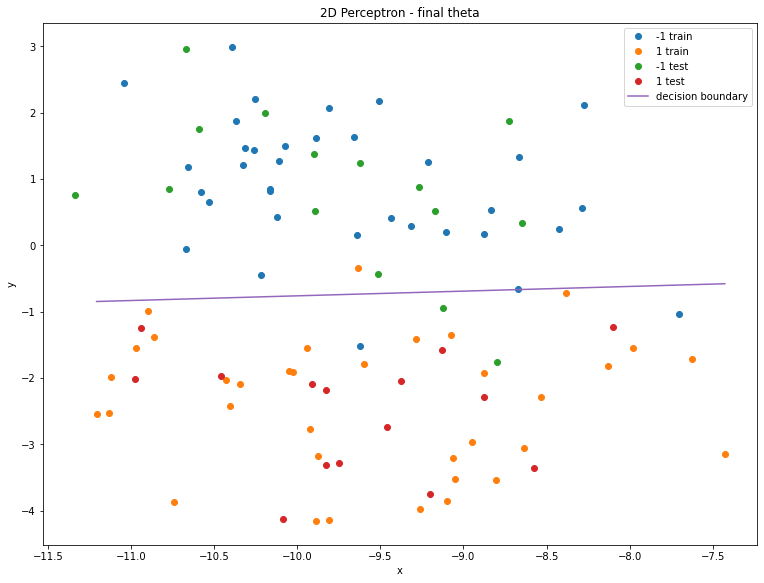

In [36]:
# perceptron instance, initialized with the previously generated
# synthetic dataset
prcpt = PerceptronClass(X_train, y_train, X_test, y_test, bias=True)

# train the perceptron for a given number of iterations
prcpt.train(n_iter=1000)

# plot the original data and the dicision boundary
prcpt.plot_blobs_2D(title=' - final theta')


In [37]:
# get the evolution of the value theata and the accuaracy
train_acc_hist = prcpt.train_acc_hist
test_acc_hist = prcpt.test_acc_hist
theta_hist = prcpt.theta_hist

# find best solution (according to train accuracy)
best_index = np.argmax(train_acc_hist)

# give some additional information on the achieved result
print('Final training accuracy: ' + str(train_acc_hist[-1]))

Final training accuracy: 0.9571428571428572


In [38]:
# predict
y_pred = prcpt.predict(X_test)
skl_acc = accuracy_score(y_test, y_pred)

print('sklearn: final test accuracy: ' +  str(skl_acc))

sklearn: final test accuracy: 0.9333333333333333


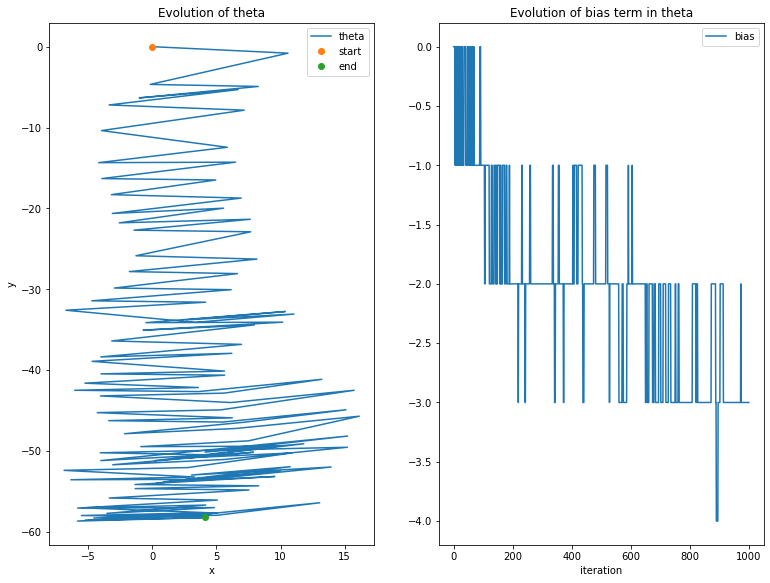

In [39]:
# plot the evolution of theta
fig, ax = plt.subplots(1, 2)
ax[0].plot(theta_hist[:, 0], theta_hist[:, 1],
           label='theta')
ax[0].plot(theta_hist[0, 0], theta_hist[0, 1],
           marker='o',
           linestyle='',
           label='start')
ax[0].plot(theta_hist[-1, 0], theta_hist[-1, 1],
           marker='o',
           linestyle='',
           label='end')
ax[0].set(title='Evolution of theta',
          xlabel='x',
          ylabel='y')
ax[0].legend()

# plot the evolution of the bias term in theta
ax[1].plot(theta_hist[:, 2], label='bias')
ax[1].set(title='Evolution of bias term in theta',
          xlabel='iteration',
          ylabel='')
ax[1].legend()
plt.show()

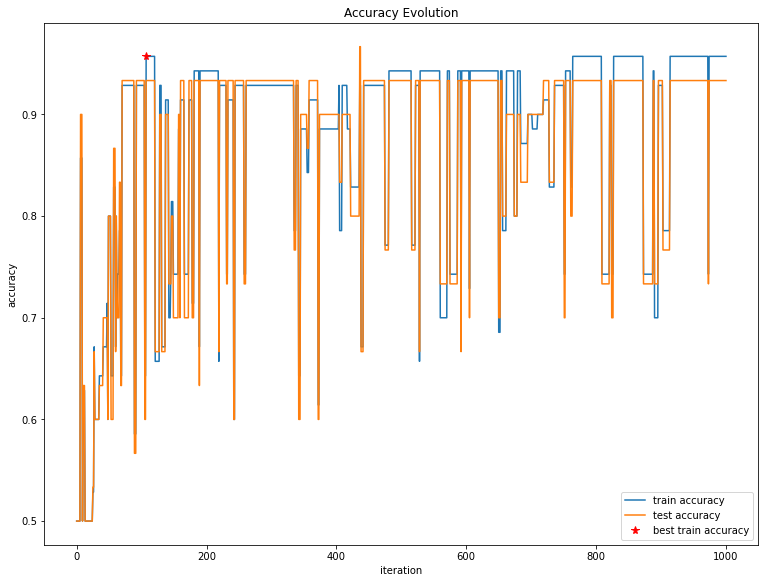

In [40]:
# plot the evolution of the training accuracy
fig, ax = plt.subplots()
ax.plot(train_acc_hist, label='train accuracy')
ax.plot(test_acc_hist, label='test accuracy')
ax.plot(best_index, train_acc_hist[best_index],
        marker='*',
        color='red',
        linestyle='',
        markersize=8,
        label='best train accuracy')
ax.set(title='Accuracy Evolution',
       xlabel='iteration',
       ylabel='accuracy')
ax.legend()
plt.show()

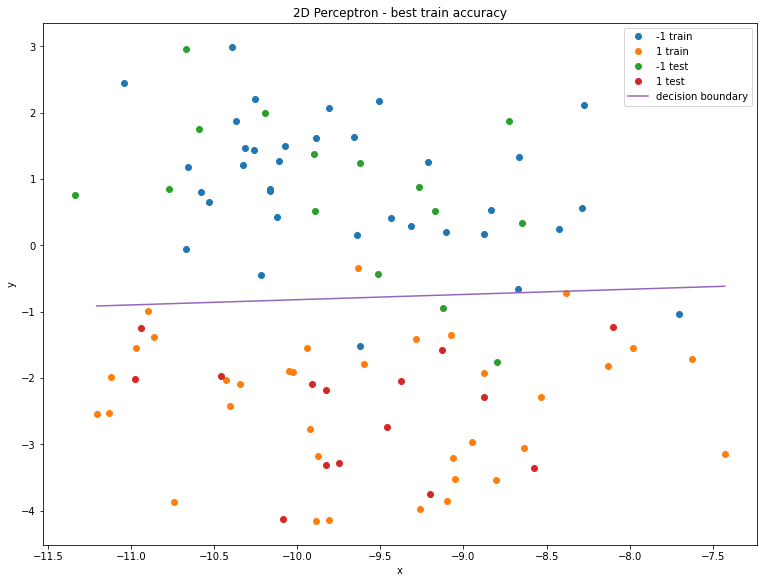

In [41]:
# plot blobs with best training decision boundary
prcpt.plot_blobs_2D(theta_plot=theta_hist[best_index, :], title=' - best train accuracy')